In [1]:
import cv2

import matplotlib.pyplot as plt
from numpy import uint8, ones, array, fft, log, abs, zeros, int0
from os import listdir
from os.path import isfile, join
path = '../DATA/ALL/'
files = [path+f for f in listdir(path) if isfile(join(path, f))]
cv2.__version__
len(files)

200

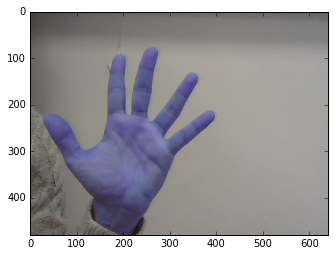

480 640


In [ ]:
img_bgr = cv2.imread(files[1])
plt.imshow(img_bgr)
plt.show()
h,w =img_bgr.shape[:2]
print(h,w)

# define range of hand color in BGR
upper_red = array([125,125, 255])
lower_red = array( [0, 0, 130])

upper_red_2 = array([100,125, 255])
lower_red_2 = array( [0, 0, 60])

# Threshold the BGR image to get only blue colors
mask = cv2.inRange(img_bgr, lower_red_2, upper_red_2)

# Bitwise-AND mask and original image

img_masked = cv2.bitwise_and(img_bgr,img_bgr, mask= mask)

cv2.imwrite('mask.png',img_masked)

cv2.imshow('res',img_masked)
cv2.waitKey()
cv2.destroyAllWindows()

plt.show()

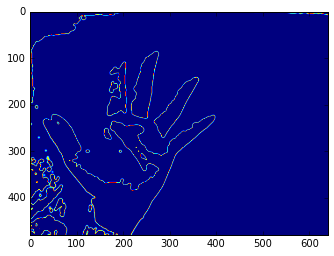

In [24]:

img_filtered = cv2.medianBlur(img_masked, 5)
gray = cv2.cvtColor(img_filtered,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
ret,thresh1 = cv2.threshold(blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_,thresh2 = cv2.threshold(blur,255,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
plt.imshow(thresh2)
plt.show()


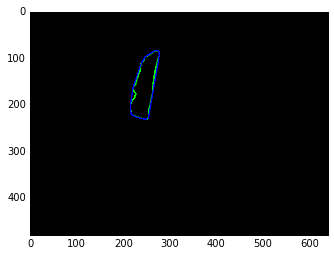

In [25]:
_, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE ,cv2.CHAIN_APPROX_SIMPLE)
max_area = 0
ci = None
for i in range(len(contours)):
    cnt=contours[i]
    area = cv2.contourArea(cnt)
    if(area>max_area):
        max_area=area
        ci=i
cnt=contours[ci]
hull = cv2.convexHull(cnt)                                    
drawing = zeros(img_bgr.shape,uint8)
cv2.drawContours(drawing,[cnt],0,(0,255,0),2)
cv2.drawContours(drawing,[hull],0,(0,0,255),2)
plt.imshow(drawing)
plt.show()

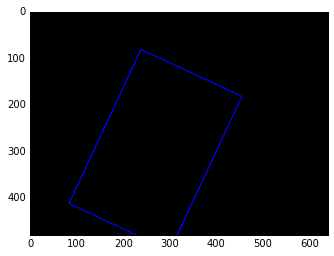

In [21]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = int0(box)
rectangle = zeros(img_bgr.shape,uint8)
cv2.drawContours(rectangle,[box],0,(0,0,255),2)
plt.imshow(rectangle)
plt.show()

In [ ]:
help(cv2.inRange)